<a href="https://colab.research.google.com/github/pulkit48/Deep-Learning/blob/main/04_Methods_to_improve_performance_of_NN/07_Zero_Initialisation_signmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ushape.csv')


In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


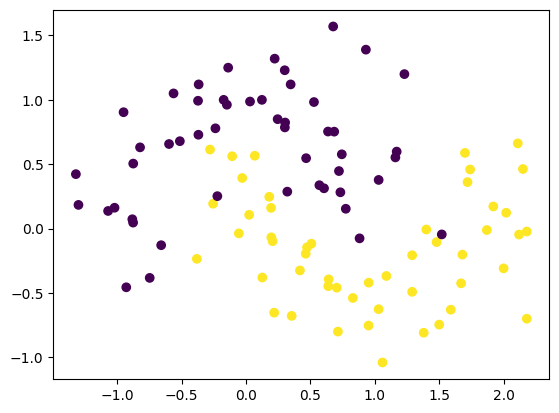

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model=Sequential()
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.get_weights()

[array([[ 0.08891165,  0.19785553, -0.65805995, -0.26338375,  0.27075034,
          0.69503695, -0.63048834, -0.24211559, -0.4703738 , -0.46548986],
        [ 0.16667002,  0.26750618,  0.22997683,  0.5136278 ,  0.27973568,
          0.00583547, -0.5128751 , -0.31313607,  0.20060635,  0.5933401 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.35316405],
        [-0.5231532 ],
        [ 0.5355188 ],
        [-0.70245105],
        [-0.4136157 ],
        [-0.3896169 ],
        [ 0.7058931 ],
        [-0.18647712],
        [-0.5220317 ],
        [-0.39229918]], dtype=float32),
 array([0.], dtype=float32)]

In [10]:
initial_weights = model.get_weights()

In [11]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [12]:
model.set_weights(initial_weights)

In [13]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



In [22]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 102ms/step - loss: 0.6707 - accuracy: 0.5000 - val_loss: 0.6611 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6700 - accuracy: 0.5000 - val_loss: 0.6605 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6697 - accuracy: 0.5000 - val_loss: 0.6599 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6692 - accuracy: 0.5000 - val_loss: 0.6594 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6688 - accuracy: 0.5000 - val_loss: 0.6588 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 21ms/step - loss: 0.6683 - accuracy: 0.5000 - val_loss: 0.6582 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6679 - accuracy: 0.5000 - val_loss: 0.6577 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

9600/9600 [==============================] - 18s 2ms/step


<Axes: >

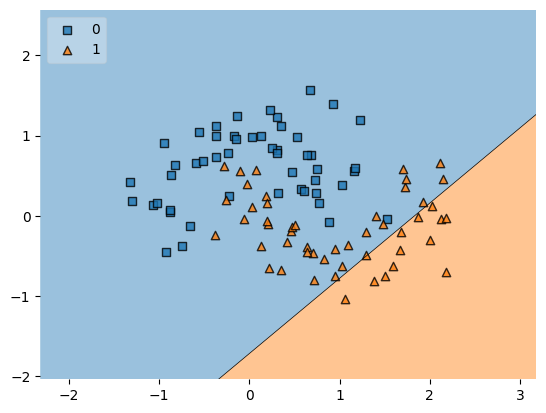

In [23]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)